In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **Import Dataset**

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Tipe Data**

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(dataset.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['Insulin'] = imputer.fit_transform(dataset[['Insulin']])

In [6]:
print(dataset.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
dataset.duplicated().sum()

0

### Variabel Target : Outcome
- 0 - No diabetes
- 1 - Diabetes

## **Heatmap Correlation Data**

<AxesSubplot:>

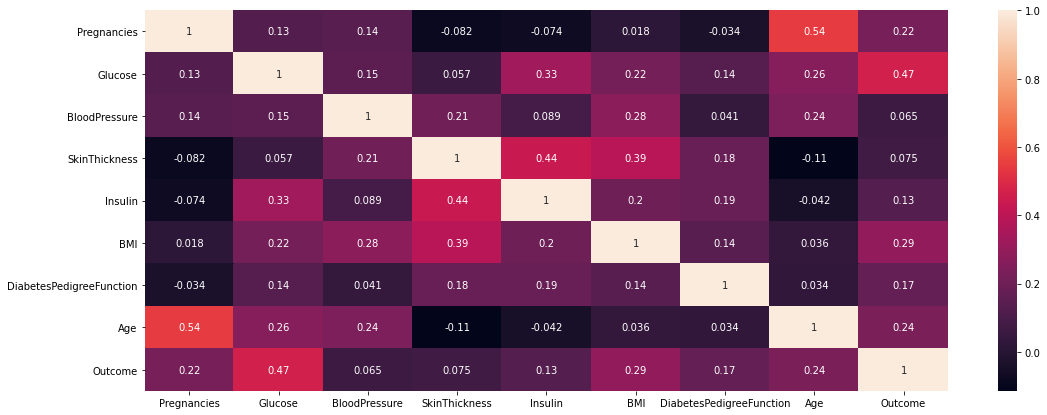

In [9]:
plt.figure(figsize=(18,7))
sns.heatmap(dataset.corr(), annot=True)

## **Pivot Table**
Pivot table adalah salah satu teknik analisis data yang digunakan untuk merangkum dan mengubah tampilan data mentah dalam bentuk tabel ke dalam bentuk tabel yang lebih ringkas dan mudah dipahami. Pivot table memungkinkan pengguna untuk memahami data dalam perspektif yang berbeda dan memberikan wawasan baru yang mungkin tidak terlihat dari data mentah.

Dalam pivot table, data yang diberikan dikelompokkan dan disusun ke dalam bentuk tabel yang baru, di mana setiap kolom dan baris mewakili kategori atau variabel yang berbeda dan elemen di dalam tabel mewakili nilai dari metrik tertentu (jumlah, rata-rata, maksimum, minimum, dll) yang dihitung untuk setiap kombinasi dari kategori atau variabel tersebut.

Dalam hal ini, pivot table berguna untuk memberikan ringkasan yang jelas dan mudah dipahami dari data yang kompleks dan berantakan, sehingga memudahkan pengguna untuk mengambil keputusan dan membuat analisis lebih lanjut. Pivot table sering digunakan dalam bidang keuangan, pemasaran, dan operasi bisnis, serta dalam analisis data dalam berbagai jenis industri.

In [10]:
# numerical
num_data = dataset.drop(columns=['Outcome'])

In [11]:
num_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

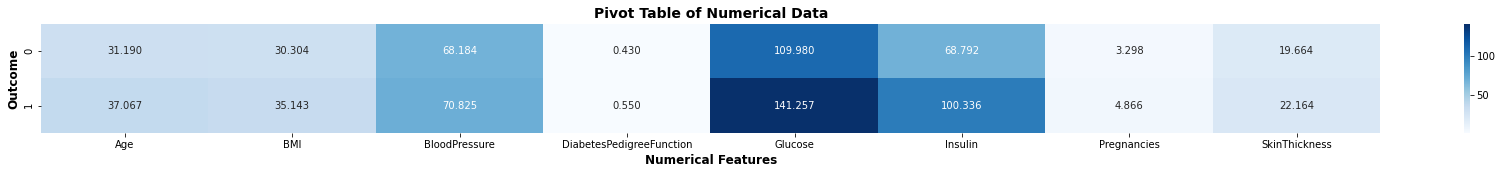

In [12]:
# pivot table
pivot_table = pd.pivot_table(dataset, index = 'Outcome', values = num_data.columns)

# plot heatmap
fig, ax = plt.subplots(figsize=(30, 2))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='Blues', ax=ax)
ax.set_title('Pivot Table of Numerical Data', fontsize=14, fontweight = 'bold')
ax.set_xlabel('Numerical Features', fontsize=12, fontweight = 'bold')
ax.set_ylabel('Outcome', fontsize=12, fontweight = 'bold')

plt.show()

## **Outlier**

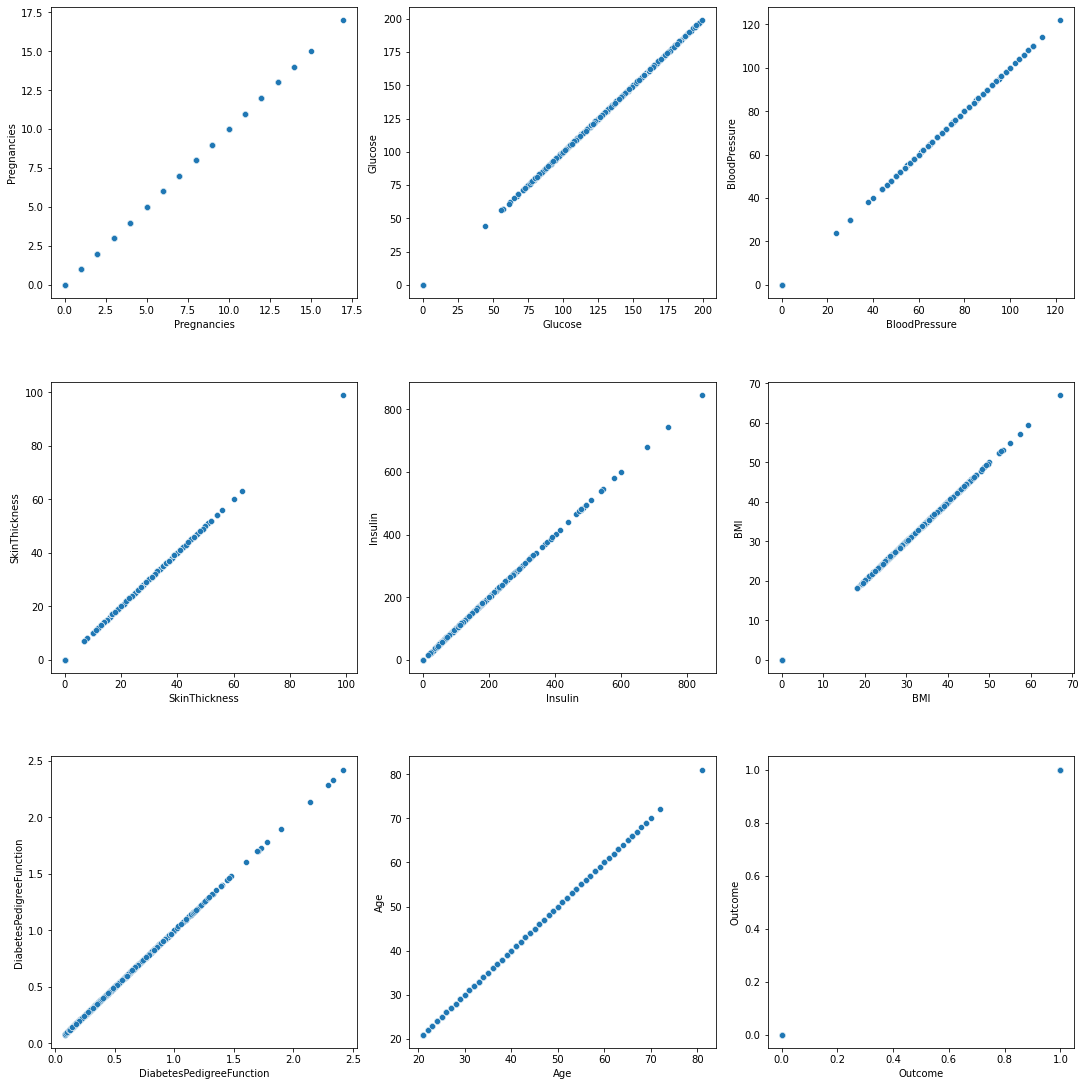

In [13]:
import matplotlib as mpl

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
index = 0
axs = axs.flatten()

for k,v in dataset.items():
    sns.scatterplot(y=k, x=v, data=dataset, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

## **Split Data**

In [14]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.30
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

## **Model Prediksi**
Model prediksi yang digunakan yaitu:

- **Logistic Regression (LR)**: model yang digunakan untuk memprediksi variabel target dengan menggunakan kombinasi linier dari fitur masukan.
- **Linear Discriminant Analysis (LDA)**: model yang digunakan untuk mencari garis pemisah antar kelas yang optimal berdasarkan perbedaan mean - antara kelas dan kovarians antar kelas.
- **K-Nearest Neighbors (KNN)**: model yang digunakan untuk melakukan klasifikasi berdasarkan kedekatan dengan tetangga terdekat (k-NN) dari setiap sampel di ruang fitur.
- **Decision Tree Classifier (CART)**: model yang digunakan untuk melakukan klasifikasi dengan membuat pohon keputusan, yaitu model yang memisahkan data berdasarkan serangkaian aturan berhierarki.
- **Gaussian Naive Bayes (NB)**: model yang digunakan untuk memprediksi variabel target dengan menghitung probabilitas setiap fitur terhadap setiap kelas dan menggunakan teorema Bayes.
- **Random Forest Classifier (RF)**: model yang digunakan untuk memprediksi variabel target dengan membuat sejumlah besar pohon keputusan dan mengambil keputusan berdasarkan mayoritas suara dari pohon-pohon tersebut.
- **Multi-Layer Perceptron (MLP)**: model yang digunakan untuk memprediksi variabel target dengan menggunakan jaringan saraf tiruan yang terdiri dari lapisan input, lapisan tersembunyi, dan lapisan output.

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [17]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.780189 (0.062658)
LDA: 0.778337 (0.053582)
KNN: 0.748532 (0.034899)
CART: 0.716771 (0.067550)
NB: 0.754018 (0.063318)
SVM: 0.763452 (0.044113)


c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optim

MLP: 0.757932 (0.043722)


c:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


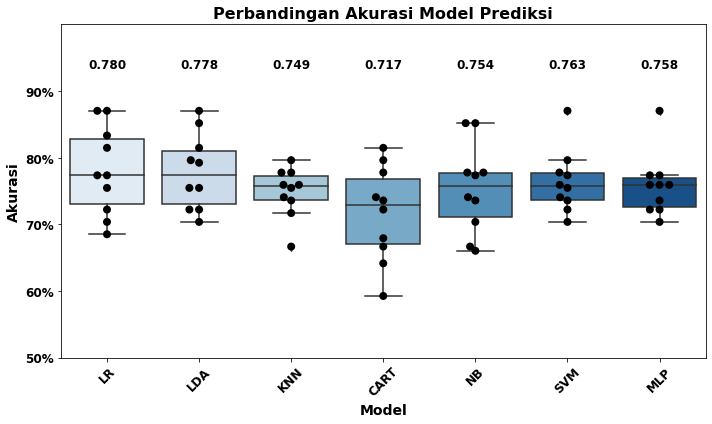

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

mean_acc = [np.mean(result) for result in results]
sns.barplot(x=names, y=mean_acc, palette='Blues')

ax.set_xticklabels(names, fontsize=12, fontweight='bold', rotation=45)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_yticklabels(['50%', '60%', '70%', '80%', '90%'], fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Akurasi', fontsize=14, fontweight='bold')
ax.set_title('Perbandingan Akurasi Model Prediksi', fontsize=16, fontweight='bold')

for i, acc in enumerate(mean_acc):
    plt.text(i, acc+0.01, '{:.3f}'.format(acc), ha='center', fontsize=12, fontweight='bold')

plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()


## **Best Performance Model**

In [19]:
# print the best model
best_model_idx = np.argmax([x.mean() for x in results])
print('Best model: {}'.format(names[best_model_idx]))
print('Accuracy: {}'.format(results[best_model_idx].mean()))

Best model: LR
Accuracy: 0.780188679245283
